In [5]:
import networkx as nx


In [6]:
def ooa_gutenkunst(params):
    (nuA, TA, nuB, TB, nuEu0, nuEuF, nuAs0, nuAsF, TF,
        mAfB, mAfEu, mAfAs, mEuAs) = params
    G = nx.DiGraph()
    # add populations, including root (the equilibrium state before expansion)
    G.add_node('root', nu=1, T=0) # (or T=inf)
    G.add_node('A', nu=nuA, T=TA)
    G.add_node('B', nu=nuB, T=TB, 
        m={'YRI':mAfB})
    G.add_node('YRI', nu=nuA, T=TB+TF)
    G.add_node('CEU', nu0=nuEu0, nuF=nuEuF, T=TF,
        m={'YRI': mAfEu, 'CHB': mEuAs})
    G.add_node('CHB', nu0=nuAs0, nuF=nuAsF, T=TF,
        m={'YRI': mAfAs, 'CEU': mEuAs})
    # define relationships
    G.add_edges_from( [ ('root', 'A'), ('A', 'YRI'),
        ('A', 'B'), ('B', 'CEU'), ('B', 'CHB') ] )

    return G


In [8]:
g = ooa_gutenkunst([300, 4500, 350, 5500, 400, 420, 355, 500, 5000, 0, 0, 0, 0])

/Users/chichun/miniconda3/envs/momi/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/chichun/miniconda3/envs/momi/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


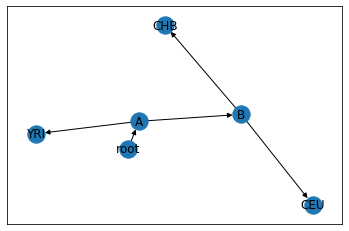

In [16]:
nx.draw_networkx(g)